<a href="https://colab.research.google.com/github/Citra11/Capstone-3-/blob/main/Bank_Term_Deposit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bank Term Deposit Prediction**

This project contains details of a direct marketing campaign of a portuguese bank. The marketing campaign was used market term deposit to the clients. It contains information bank client data such as client Age , Job , personal loans status , details of previous marketing campaigns etc
The goal of the project is to predict which clients will subscribe for a Term Deposit and which features are most important in the prediction process.


In [ ]:
#Import the pandas library for data manipulation
import pandas as pd
#Import numpy library for algebraic operations
import numpy as np

#Import seaborn for data visualization
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Capstone 3/bank-additional-full.csv"
df_bonus = pd.read_csv(path, delimiter=';')
# Dataset is now stored in a Pandas Dataframe

df_bonus.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df_bonus.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_bonus.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### **Data Exploration**

The goal of the project is to predict which clients will subscribe for a term deposit and which features are most important in the prediction process

In [ ]:
df_bonus['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

We see here that majority of the clients did not subscribe to a term deposit.


**Bivariate analysis with target variable**

In [ ]:
sns.set_palette("bright")

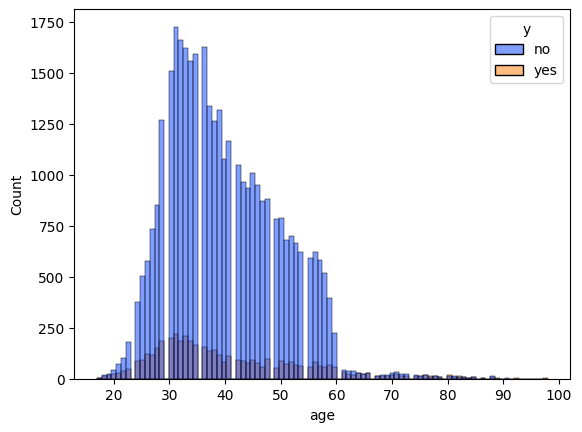

In [ ]:
sns.histplot(x="age", hue='y', color=('green','deepskyblue'),data=df_bonus);
#sns.histplot(df_bonus.age, color='green', stat='density')
#sns.kdeplot(df_bonus, color='orange')

The above chart shows age distribution of the clients who did and did not subscribe to a term deposit

Most clients close to the Age 35 subscribe to a term deposit.

Actionable insight - clients above the age 60 had more chances of getting a term deposit, so they can be the ones who can be targetted.

**Marital status vs Term Deposit**

<Axes: xlabel='marital', ylabel='count'>

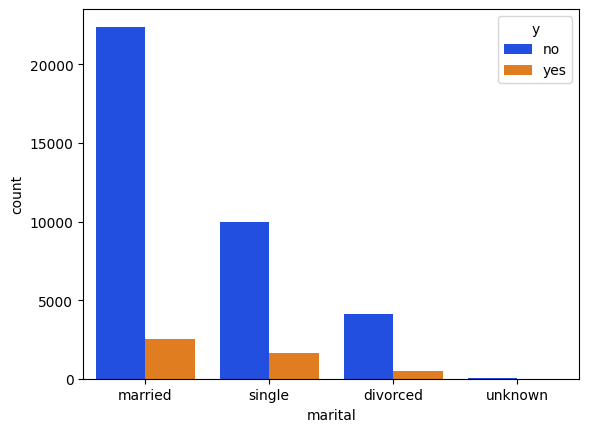

In [ ]:
sns.countplot(x = "marital" ,hue='y' ,  data = df_bonus)

We see from the above plot majority of the clients are married , and also maximum clients who subscribed to a term deposit are married.

Actionable Insight - Married clients have a higher chance of obtaining a term deposit so they can be targetted in the marketing campaigns

**Job Type VS Term Deposit**

<Axes: xlabel='job', ylabel='count'>

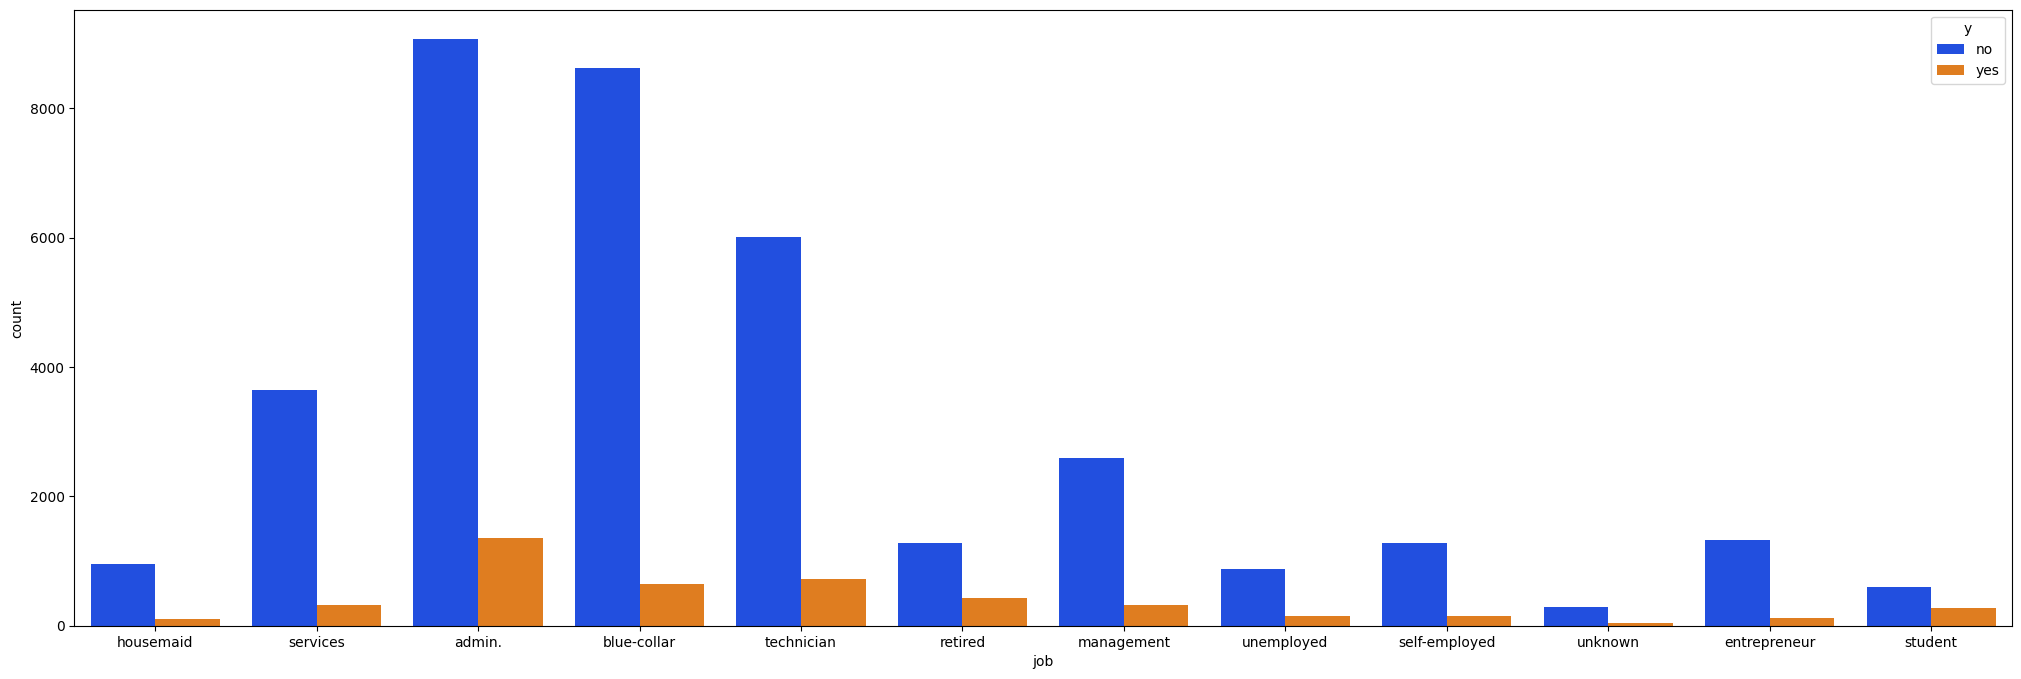

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot( x='job',  hue='y', data= df_bonus)

Now the above figure shows a very distinct picture.

Actionable insight - Majority of the clients of the bank have admin jobs , and those are the ones having the max number of term deposits followed by technicians. The Bank can target people with job titles related to Admin and Technician

**Education Type and Term Deposit**

<Axes: xlabel='education', ylabel='count'>

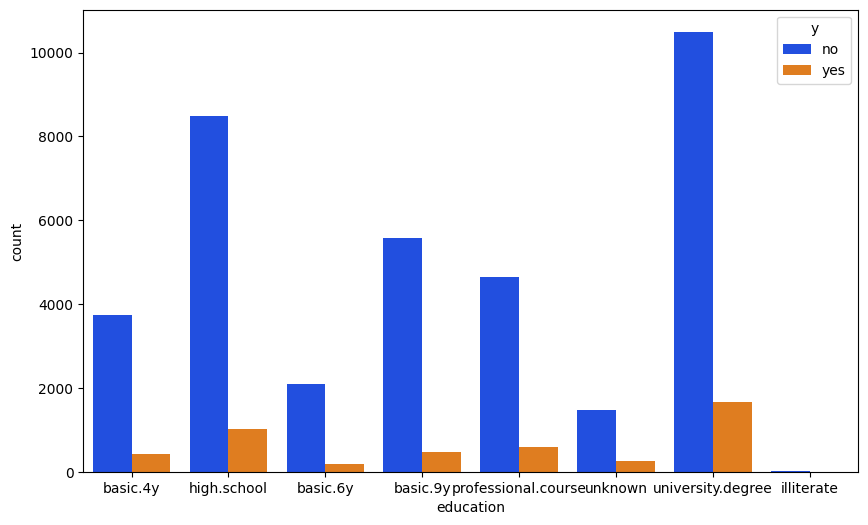

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', hue ='y', data=df_bonus)

We can see from the above plot most clients of the bank have either a university degree or a high school education.

The clients with university degree have the highest number of term deposits followed by clients with high school education.

Actionable Insight - The bank can target people who have a high school or a university degree.



**Credit Default and Term deposits**

<Axes: xlabel='default', ylabel='count'>

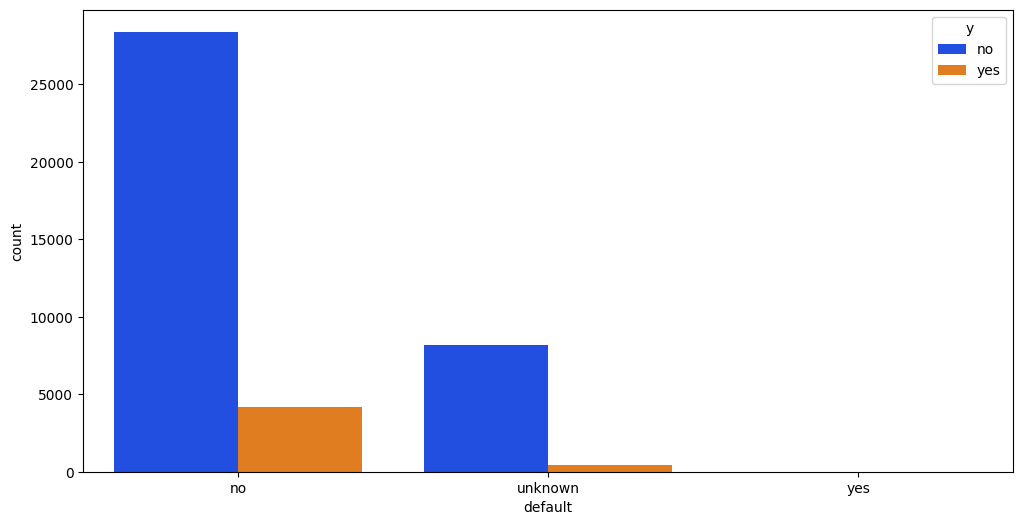

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'default' , hue = "y"  , data = df_bonus)

The above plot shows most of the clients do not default on their credit ( which is expected) and close to 5000 of these clients subscribe to term deposits

Actionable Insight - Bank should not approach clients who have a Credit default for Term Deposits

**Housing Loan vs Term Deposit**

<Axes: xlabel='housing', ylabel='count'>

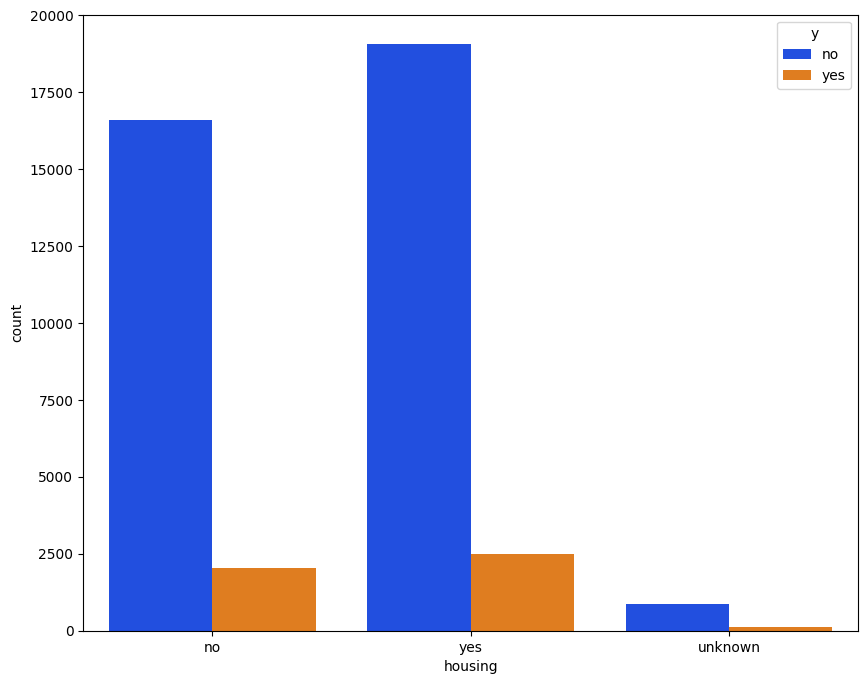

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='housing', hue='y', data= df_bonus)

This plot shows that clients that had a housing loan tend to have more term deposits than those who dont have a term deposit.

Actionable insights - The Bank can target clients who have a housing Loan for term Deposits.

**Personal Loan vs Term Deposit**

<Axes: xlabel='loan', ylabel='count'>

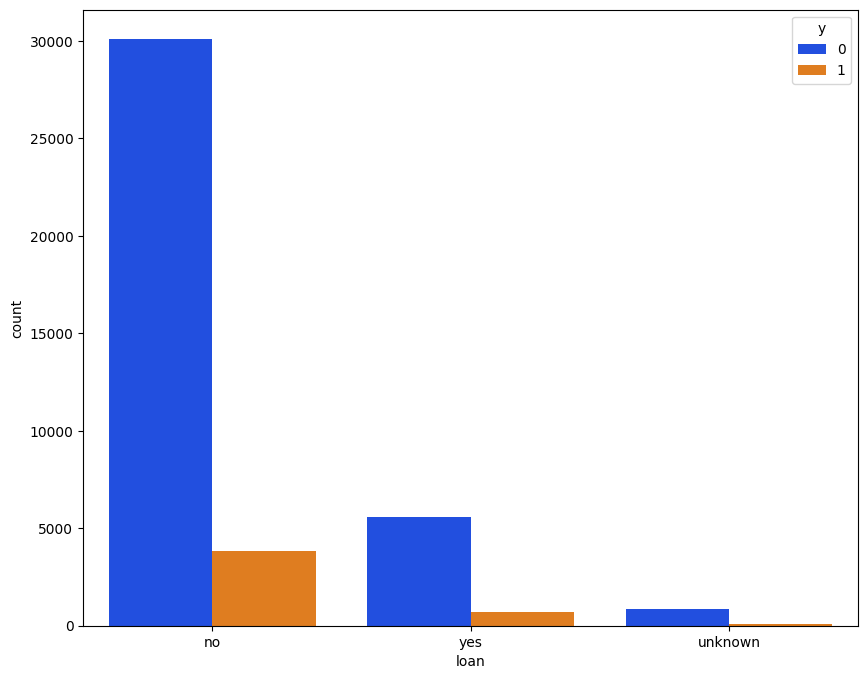

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot ( x='loan', hue ='y' , data = df_bonus)


The above plot shows that most of the clients did not have a personal loan , and of those who dont approximately 4000 subscribed to a term deposit.

Actionable insight - The bank can target people who do not have a personal loan

**Current campaign features**

Lets see how the current marketing campaign fared

Marketing Communication

<Axes: xlabel='contact', ylabel='count'>

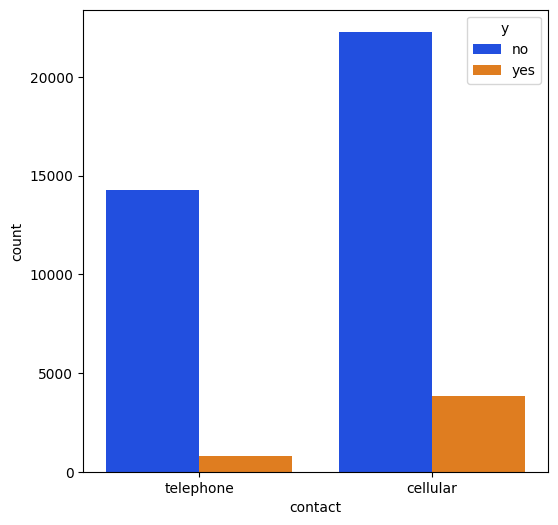

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'contact' , hue = "y" , data = df_bonus)

This plot shows most people were contacted through a cellular contact number and also higher number of term deposits

Actionable Insight - The bank can prioritize Cellular marketing channel over other channels in the campaign

<Axes: xlabel='month', ylabel='count'>

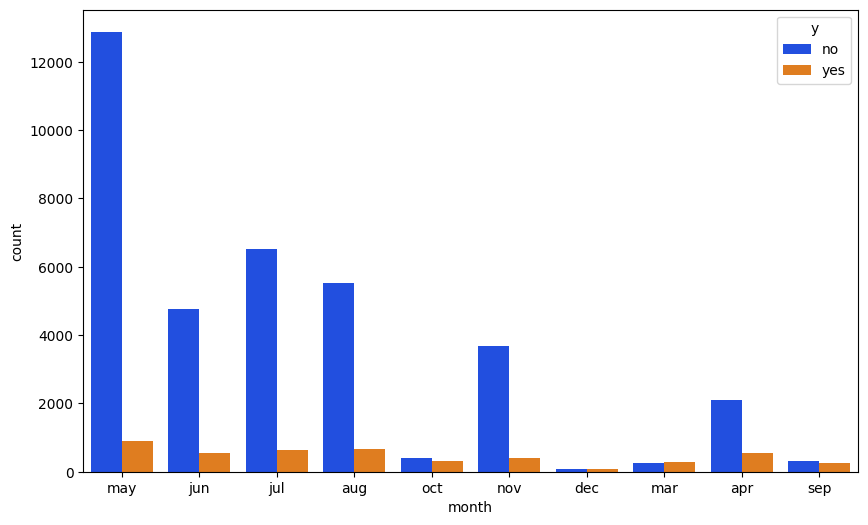

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='y', data= df_bonus)

The above plot shows there isnt a significant difference in the term deposit subscripctions based on which day of the week the client was contacted

**Number of contacts during campaign vs Term Deposits**

<Axes: xlabel='y', ylabel='campaign'>

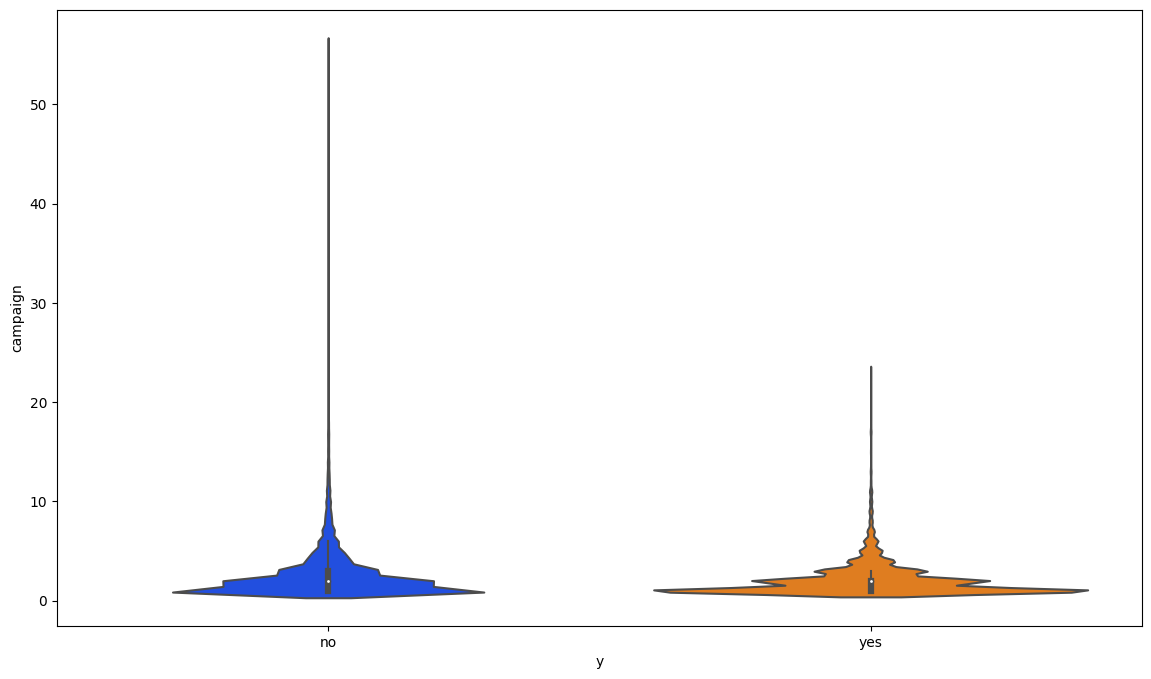

In [ ]:
plt.figure(figsize=(14,8))
sns.violinplot(x="y", y="campaign", data = df_bonus)



**Hypothese One**

The average age of customers who do not have term deposit is equal to the average age of customer who have



In [ ]:
df_bonus.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df_bonus.age

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

In [ ]:
df_age_yes = df_bonus.loc[df_bonus.y == 'yes']
df_age_no = df_bonus.loc[df_bonus.y == 'no']

In [ ]:
df_bonus

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df_age_no.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
from statsmodels.stats.weightstats import ztest
ztest_result = ztest(df_age_yes.age,df_age_no.age)

In [ ]:
ztest_result[0]

6.172087109640128

In [ ]:
#from statsmodels.stats.weightstats import ztest
#ztest_result = ztest(df_age_yes.age,df_age_no.age)
ztest_result
z_statistic = ztest_result[0]
p_value = ztest_result[1]
print("Z-Statistics: ", z_statistic)
print("P-Value: ", p_value)

Z-Statistics:  6.172087109640128
P-Value:  6.739434944311709e-10


**This low p-value proves that null hypothesis can be rejected**

<Axes: xlabel='y', ylabel='age'>

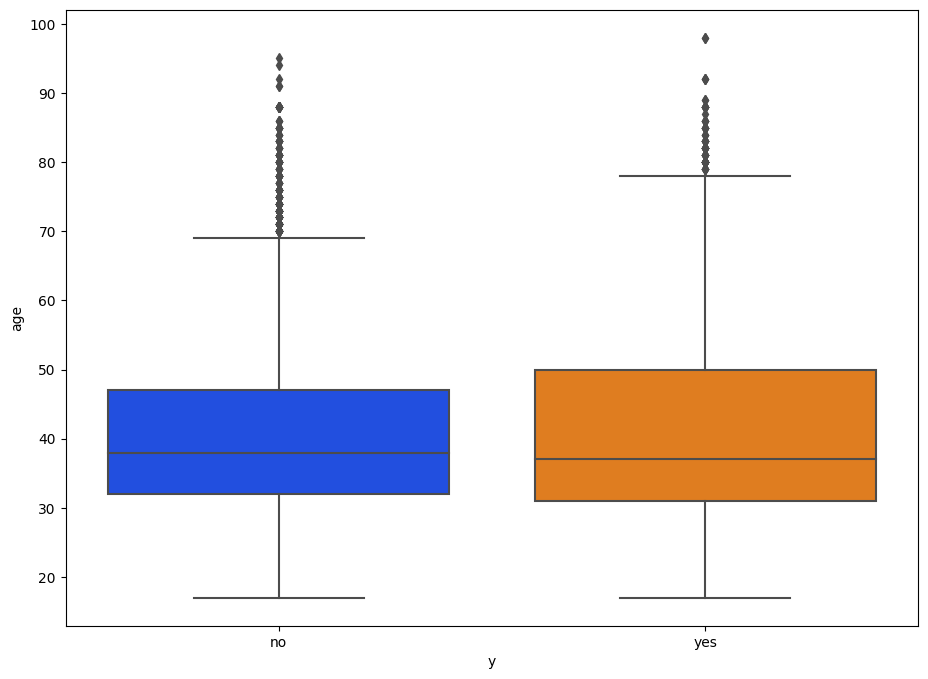

In [ ]:
plt.figure(figsize=(11,8))
sns.boxplot(x="y", y="age", data = df_bonus)



**hypothesis 2 testing**

There is impact of number of contacts during the campaign on term deposit

OR More contact is equal to more customers subscribing to term Deposit

In [ ]:
ztest_result = ztest(df_age_yes.campaign,df_age_no.campaign)
z_statistic = ztest_result[0]
p_value = ztest_result[1]
print("Z-Statistics: ", z_statistic)
print("P-Value: ", p_value)

Z-Statistics:  -13.496542997299592
P-Value:  1.6388766589153034e-41


In [ ]:
df_avg = df_bonus.campaign.mean()
print ("Average number of contacts made during the campaign", df_avg)

df_age_yes = df_bonus.loc[df_bonus.y == 'yes',:]
avg_campaign_yes = df_age_yes.campaign.mean()
print("Average number of contacts during the campaign for people who bought the term insurance", avg_campaign_yes)


df_age_no = df_bonus.loc[df_bonus.y == 'no',:]
avg_campaign_no = df_age_no.campaign.mean()
print("Average contacts during the campaign for people who did not buy term insurance", avg_campaign_no)


Average number of contacts made during the campaign 2.567592502670681
Average number of contacts during the campaign for people who bought the term insurance 2.0517241379310347
Average contacts during the campaign for people who did not buy term insurance 2.6330852577432418


with such a low p-value, you would typically reject the null hypothesis

This proves that number of contact during the campaign had no impact on customer subcribing to the term insurance

On an average customers were contacted at least twice during a campaign


**Recommendation**

Bank should target client in the following groups to increase term deposit sales


*   Clients who are age 30 and above

*  clients who have a high school or a university degree

*   Clients who work as Admin or technicians

*   Clients who are married







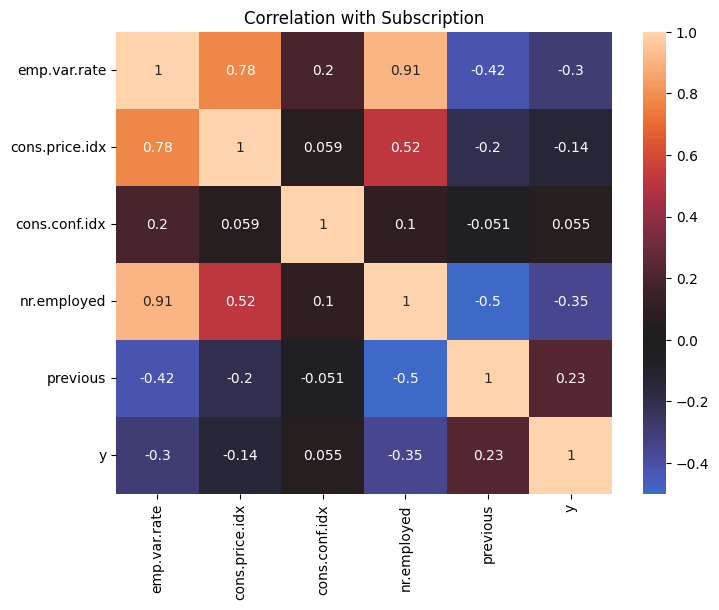

In [ ]:
features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'previous','y']
plt.figure(figsize=(8, 6))
sns.heatmap(df_bonus[features].corr(), annot=True, center=0)
plt.title('Correlation with Subscription')
plt.show()

In [ ]:
df_bonus['y'].replace("no" , 0 , inplace=True)
df_bonus['y'].replace("yes" ,1, inplace=True)

In [ ]:
df_bonus['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [ ]:
df_bonus['previous'].corr(df_bonus['y'])

0.23018100321659127